<a href="https://colab.research.google.com/github/vasuag09/credit_risk_analysis/blob/main/credit_risk_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Default
Build a model that predicts the probability that a loan applicant will default (i.e., fail to repay) within a given time horizon.

## Importing the libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Importing the dataset

In [5]:
dataset = pd.read_csv("credit_risk_dataset.csv")
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Feature Description

| **Feature Name**              | **Description**                          |
|-------------------------------|------------------------------------------|
| `person_age`                  | Age                                      |
| `person_income`               | Annual Income                            |
| `person_home_ownership`       | Home ownership                           |
| `person_emp_length`           | Employment length (in years)             |
| `loan_intent`                 | Loan intent                              |
| `loan_grade`                  | Loan grade                               |
| `loan_amnt`                   | Loan amount                              |
| `loan_int_rate`               | Interest rate                            |
| `loan_status`                 | Loan status (0 = non-default, 1 = default) |
| `loan_percent_income`         | Percent income                           |
| `cb_person_default_on_file`   | Historical default                       |
| `cb_preson_cred_hist_length`  | Credit history length                    |


## Exploratory Data Analysis (EDA)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Handling missing values

In [7]:
dataset.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


For the missing values, we are gonna fill the missing values with the median.

In [8]:
columns_with_null = dataset.columns[dataset.isnull().any()].tolist()

In [9]:
columns_with_null

['person_emp_length', 'loan_int_rate']

In [10]:
for column in columns_with_null:
  dataset[column] = dataset[column].fillna(dataset[column].median())

In [11]:
dataset.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


### Checking class balance

In [12]:
pd.DataFrame(dataset.loan_status.value_counts())

,count
loan_status,
0,25473
1,7108


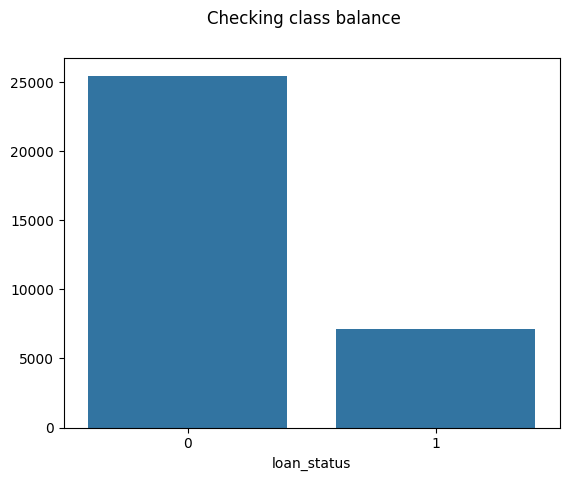

In [13]:
plt.suptitle("Checking class balance")
sns.barplot(x = dataset.loan_status.value_counts().index, y = dataset.loan_status.value_counts().values)
plt.show()

### Summarizing numerical features

In [14]:
numerical_columns = dataset.select_dtypes(include = ["float64", "int64"]).columns

In [15]:
dataset[numerical_columns].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


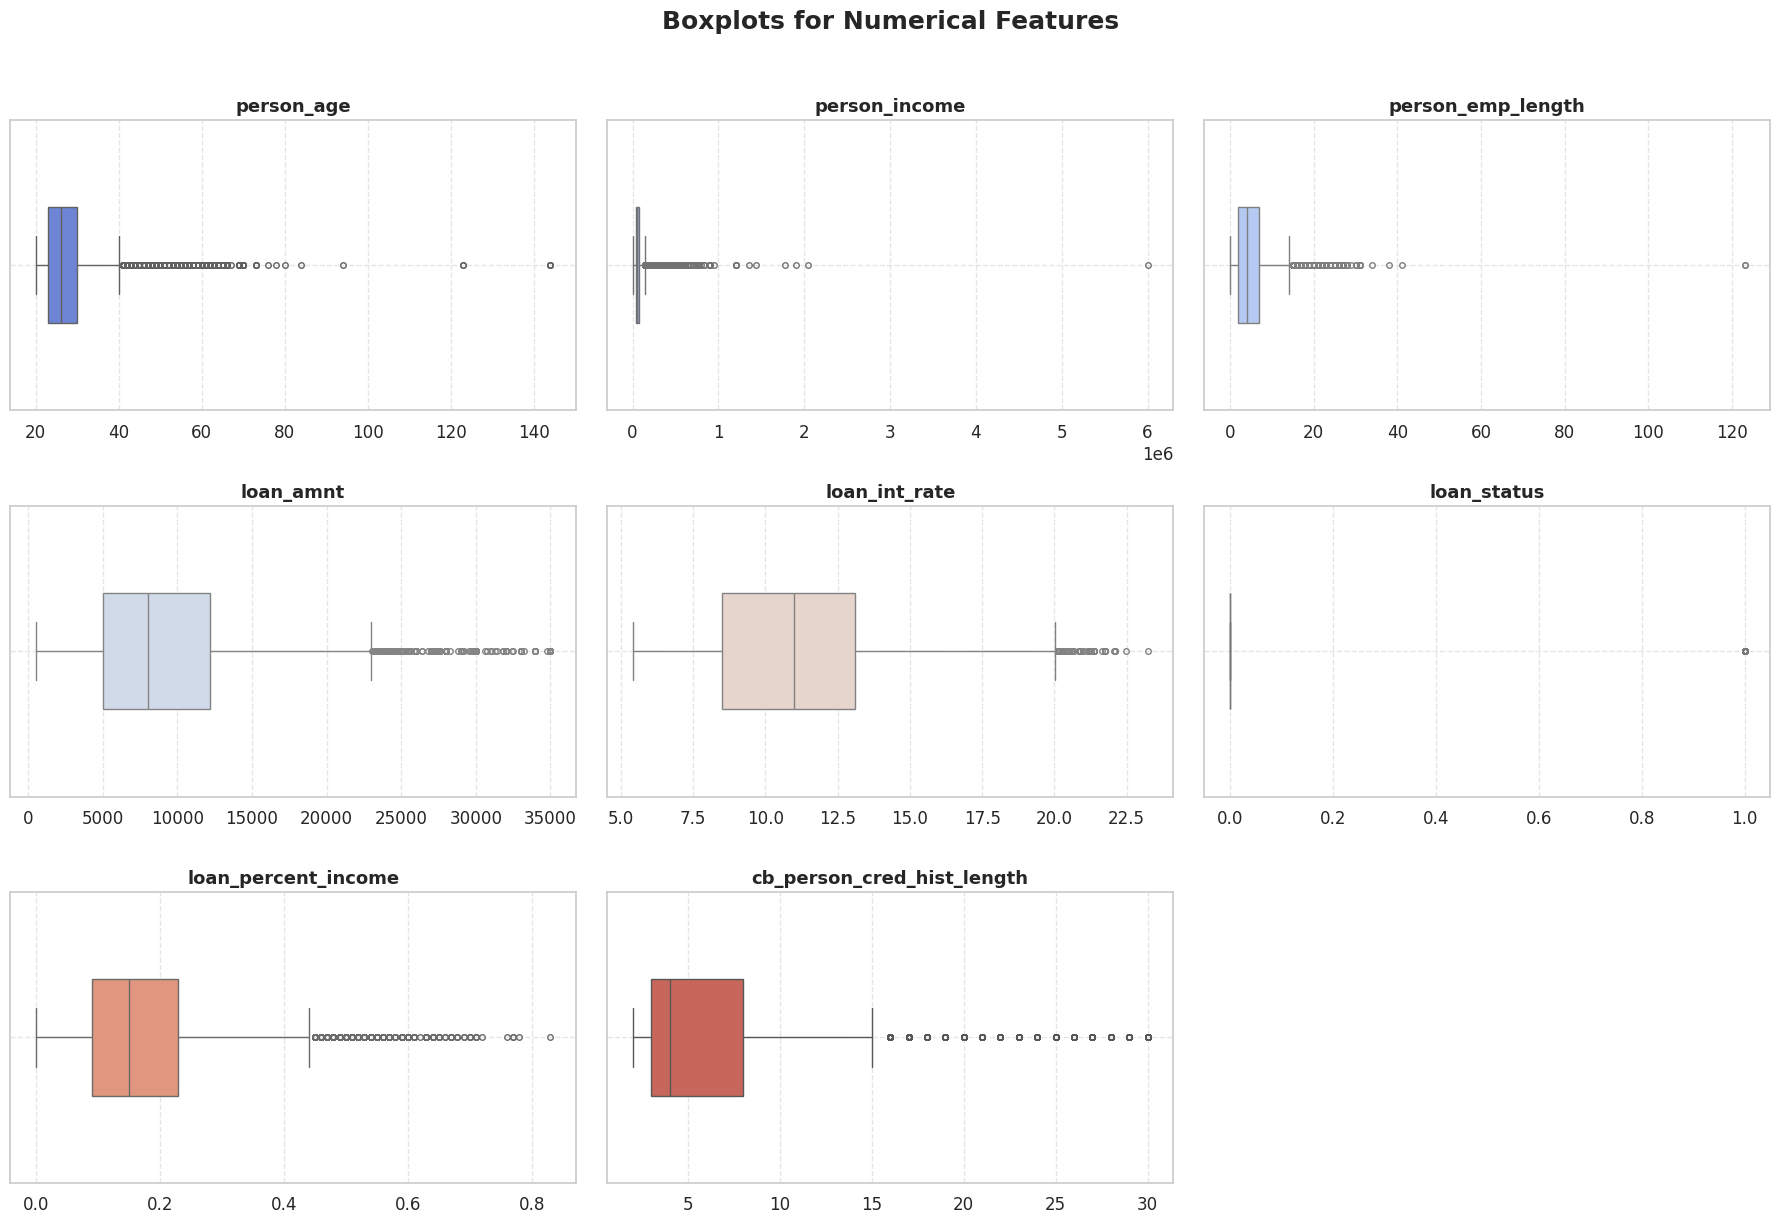

In [16]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Define figure layout
num_cols = len(numerical_columns)
cols = 3  # number of columns per row
rows = (num_cols // cols) + (num_cols % cols > 0)

plt.figure(figsize=(18, rows * 4))
plt.suptitle("Boxplots for Numerical Features", fontsize=18, fontweight='bold', y=1.02)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(
        x=dataset[column],
        color=sns.color_palette("coolwarm", n_colors=num_cols)[i-1],
        width=0.4,
        fliersize=4
    )
    plt.title(column, fontsize=13, fontweight='semibold')
    plt.xlabel("")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

🧠 Summary Insights

| Observation | Interpretation | Recommended Action |
|--------------|----------------|--------------------|
| Most features are **right-skewed** | Indicates presence of positive outliers | Apply **log transformation** or **robust scaling** |
| Strong **outliers** in income, age | Possible data entry issues | Apply **capping (winsorization)** |
| `loan_status` imbalance | Default class is underrepresented | Use **SMOTE** or **class weights** during training |
| `loan_percent_income` outliers | Capture risky borrowers | Retain — valuable predictive signal |

### Summarizing categorical features

In [17]:
categorical_columns = dataset.select_dtypes(include = ["object"]).columns
categorical_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

/tmp/ipython-input-1815036532.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x='Category', y='Count', palette='viridis', alpha=0.9)


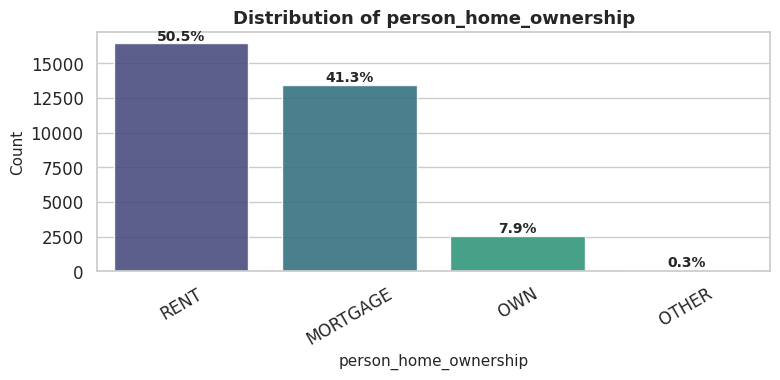

/tmp/ipython-input-1815036532.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x='Category', y='Count', palette='viridis', alpha=0.9)


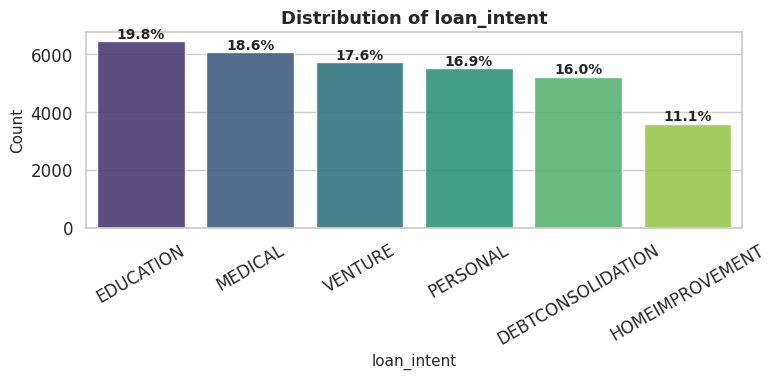

/tmp/ipython-input-1815036532.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x='Category', y='Count', palette='viridis', alpha=0.9)


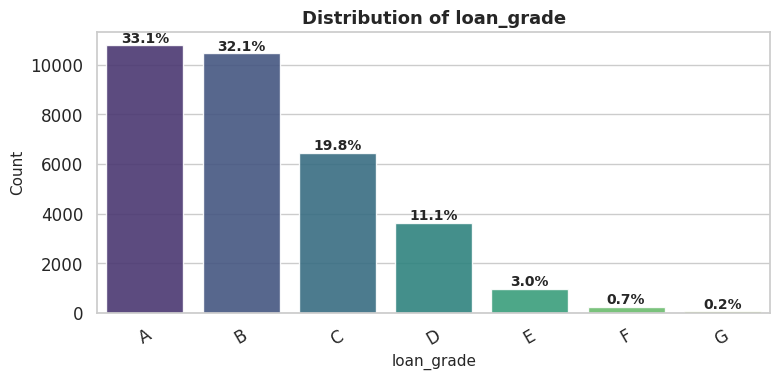

/tmp/ipython-input-1815036532.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x='Category', y='Count', palette='viridis', alpha=0.9)


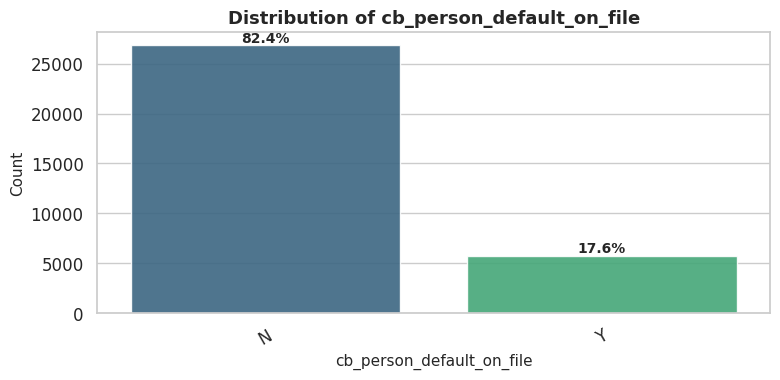

In [18]:
for column in categorical_columns:
    # Compute counts and percentages
    value_counts = dataset[column].value_counts()
    percentages = (value_counts / len(dataset) * 100).round(1)

    # Create DataFrame for easier plotting
    cat_df = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': percentages.values
    })

    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(data=cat_df, x='Category', y='Count', palette='viridis', alpha=0.9)

    # Annotate percentages on bars
    for i, p in enumerate(cat_df['Count']):
        plt.text(i, p + 0.5, f"{cat_df['Percentage'][i]}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Style
    plt.title(f"Distribution of {column}", fontsize=13, fontweight='bold')
    plt.xlabel(column, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

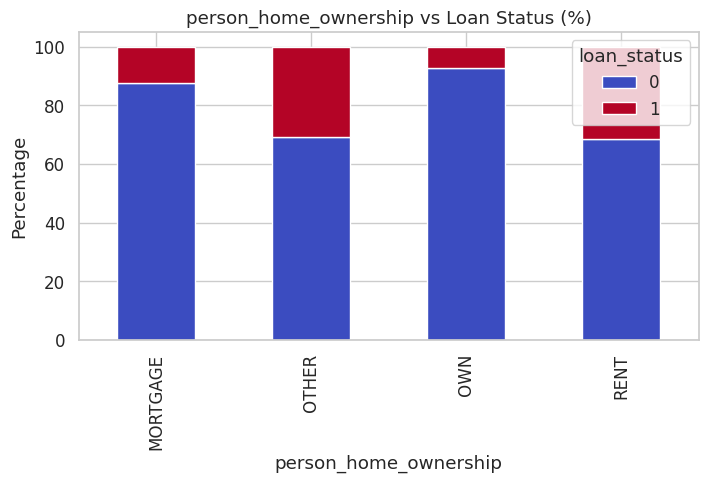

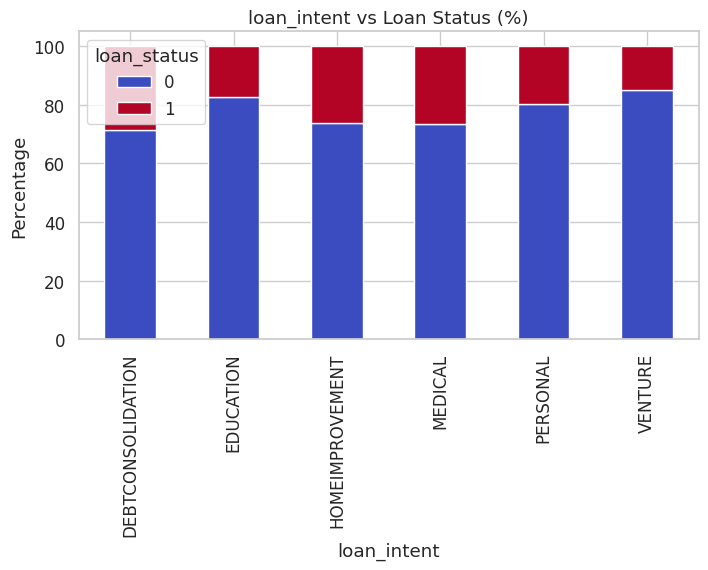

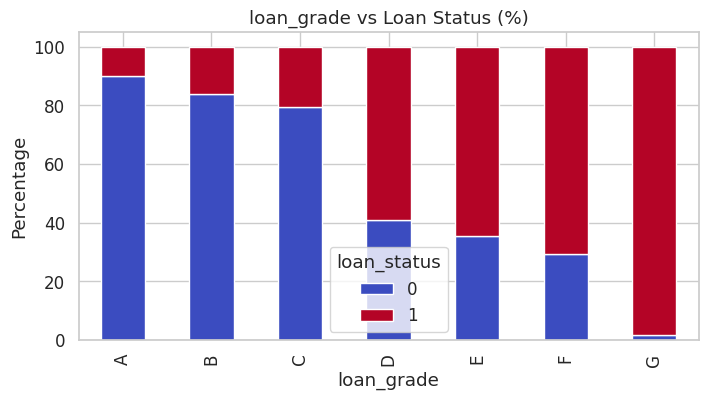

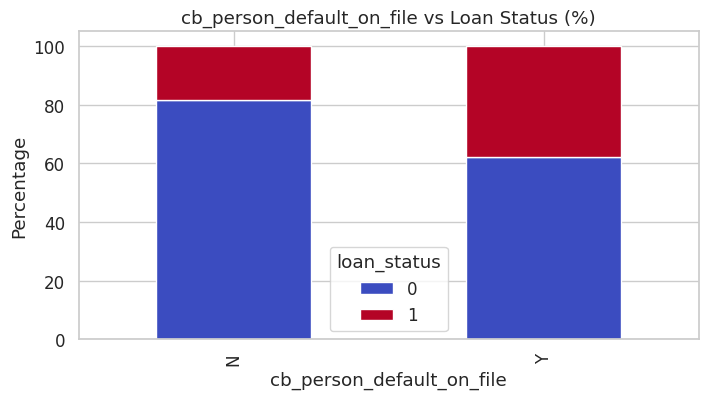

In [19]:
# Plotting relationships of categorical column with loan status
for column in categorical_columns:
    cross_tab = pd.crosstab(dataset[column], dataset['loan_status'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, figsize=(8,4), colormap='coolwarm')
    plt.title(f"{column} vs Loan Status (%)")
    plt.ylabel('Percentage')
    plt.show()

## Data Cleaning & Preprocessing

In [20]:
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (dataset[numerical_columns] < (Q1 - 1.5 * IQR)) | (dataset[numerical_columns] > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()
print(outlier_counts)

person_age                    1494
person_income                 1484
person_emp_length              853
loan_amnt                     1689
loan_int_rate                   70
loan_status                   7108
loan_percent_income            651
cb_person_cred_hist_length    1142
dtype: int64


In [21]:
# Capping these columns
for col in ['person_age', 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dataset[col] = np.where(dataset[col] < lower, lower, dataset[col])
    dataset[col] = np.where(dataset[col] > upper, upper, dataset[col])

In [22]:
# Log Transforming and then capping
# Apply log1p transformation (handles zeros safely)
dataset['person_income'] = np.log1p(dataset['person_income'])
dataset['loan_amnt'] = np.log1p(dataset['loan_amnt'])

# Then mild IQR capping
for col in ['person_income', 'loan_amnt']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dataset[col] = np.clip(dataset[col], lower, upper)

In [23]:
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (dataset[numerical_columns] < (Q1 - 1.5 * IQR)) | (dataset[numerical_columns] > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()
print(outlier_counts)

person_age                       0
person_income                    0
person_emp_length                0
loan_amnt                        0
loan_int_rate                    0
loan_status                   7108
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64


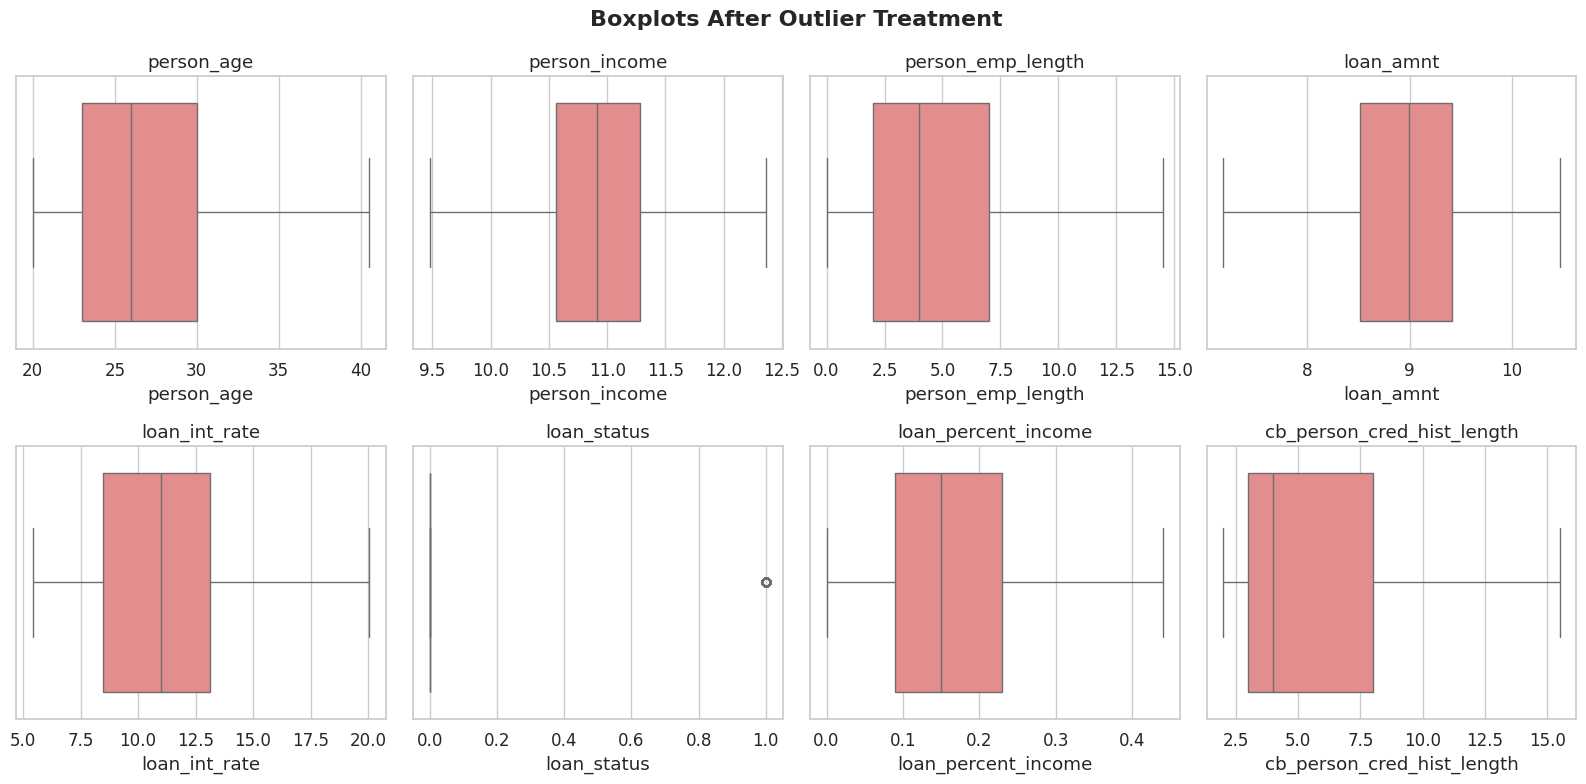

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Boxplots After Outlier Treatment", fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=dataset[col], ax=axes[i//4, i%4], color='lightcoral')
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

## Splitting the dataset

In [25]:
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,10.985310,RENT,14.5,PERSONAL,D,10.463132,16.02,1,0.44,Y,3.0
1,21.0,9.476482,OWN,5.0,EDUCATION,B,7.179573,11.14,0,0.10,N,2.0
2,25.0,9.476482,MORTGAGE,1.0,MEDICAL,C,8.612685,12.87,1,0.44,N,3.0
3,23.0,11.089821,RENT,4.0,MEDICAL,C,10.463132,15.23,1,0.44,N,2.0
4,24.0,10.904138,RENT,8.0,MEDICAL,C,10.463132,14.27,1,0.44,Y,4.0


In [26]:
from sklearn.model_selection import train_test_split
X = dataset.drop("loan_status", axis=1)
y = dataset["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [27]:
X_train.shape

(26064, 11)

In [28]:
X_test.shape

(6517, 11)

## Scaling and Encoding the features

In [29]:
numerical_columns = numerical_columns.delete(numerical_columns.get_loc("loan_status"))

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = numerical_columns
cat_features = categorical_columns

preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), num_features),
    ("encoder", OneHotEncoder(handle_unknown = "ignore"), cat_features)
    ])

# Fit on training, transform both train/test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Training the model

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

### Interpreting the model coefficients

In [33]:
coef_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                                    Feature  Coefficient
23                    encoder__loan_grade_G     3.132347
5               scaler__loan_percent_income     1.728058
22                    encoder__loan_grade_F     1.081975
10      encoder__person_home_ownership_RENT     0.805500
21                    encoder__loan_grade_E     0.724500
8      encoder__person_home_ownership_OTHER     0.590007
13     encoder__loan_intent_HOMEIMPROVEMENT     0.465898
20                    encoder__loan_grade_D     0.445798
11   encoder__loan_intent_DEBTCONSOLIDATION     0.400718
14             encoder__loan_intent_MEDICAL     0.242881
4                     scaler__loan_int_rate     0.188334
1                     scaler__person_income     0.167863
7   encoder__person_home_ownership_MORTGAGE     0.029533
0                        scaler__person_age    -0.006258
6        scaler__cb_person_cred_hist_length    -0.010591
2                 scaler__person_emp_length    -0.046490
25     encoder__cb_person_defau

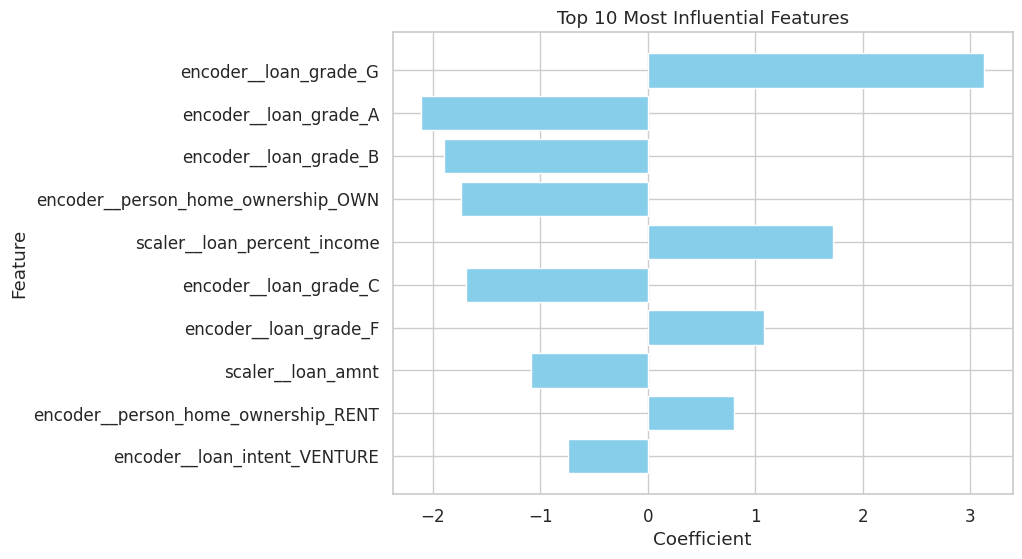

In [34]:
# Sort by absolute value of coefficients
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values('abs_coef', ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Most Influential Features')
plt.gca().invert_yaxis()
plt.show()

### Computing best decision threshold

Best Threshold: 0.39
Best F1 Score: 0.695


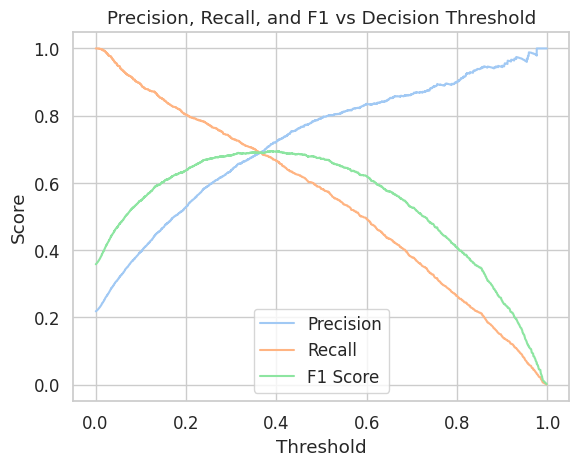

In [36]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {f1_scores[best_idx]:.3f}")

# Plot
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision, Recall, and F1 vs Decision Threshold")
plt.show()

In [37]:
y_pred_custom = (y_pred_proba >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_custom)
print(cm)

[[4713  382]
 [ 461  961]]


## Model Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5095
           1       0.72      0.68      0.70      1422

    accuracy                           0.87      6517
   macro avg       0.81      0.80      0.81      6517
weighted avg       0.87      0.87      0.87      6517

ROC-AUC: 0.8836258762831104


## Model Optimization

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_processed, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.8767753487772115


ROC-AUC = 0.8768
This measures how well your model separates the two classes (0 = non-default, 1 = default).

>0.5 → random guessing

>0.7–0.8 → decent

>0.8–0.9 → strong

>0.9 → excellent

In [41]:
best_model = grid.best_estimator_
best_model.fit(X_train_processed, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [43]:
y_pred = best_model.predict(X_test_processed)
y_proba = best_model.predict_proba(X_test_processed)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5095
           1       0.79      0.58      0.67      1422

    accuracy                           0.88      6517
   macro avg       0.84      0.77      0.80      6517
weighted avg       0.87      0.88      0.87      6517

ROC-AUC: 0.883623667890944


## Saving the model

In [44]:
import joblib

joblib.dump(best_model, "credit_risk_model.pkl")
joblib.dump(preprocessor, "credit_risk_preprocessor.pkl")

['credit_risk_preprocessor.pkl']

🏁 Conclusion

In this project, we developed a Credit Risk Prediction Model using Logistic Regression, leveraging data preprocessing techniques, exploratory data analysis (EDA), and model optimization. Through careful handling of missing values, outlier treatment, encoding, and feature scaling, we ensured data consistency and model reliability.

After training and fine-tuning the model using Stratified K-Fold cross-validation and GridSearchCV, we achieved a balanced performance with:

Accuracy: ~88%

Precision (for defaulters): 0.79

Recall (for defaulters): 0.58

ROC-AUC Score: 0.88

These results indicate that the model performs well in distinguishing between high-risk and low-risk borrowers, making it a valuable tool for financial institutions to make informed lending decisions and reduce default rates.

Finally, both the model and preprocessing pipeline were saved for future use, ensuring smooth deployment and scalability.
Further improvements could involve:

Testing with ensemble models like XGBoost or Random Forest.

Applying SMOTE or class weighting to improve recall for the minority (defaulter) class.

Integrating the model into a web dashboard for real-time loan approval predictions.

💡 This project showcases the complete lifecycle of a machine learning solution — from raw data to a production-ready predictive model.